<h2>Install Packages</h2>

In [ ]:
#Install NumPy, SciPy, sklearn, pandas, and matplotlib
!pip install -r requirements.txt

<h2>User Preferences</h2>

In [2]:
import numpy as np
import opfunu

In [3]:
# Select optimizers
# "SSA","PSO","GA","BAT","FFA","GWO","WOA","MVO","MFO","CS","HHO","SCA","JAYA","DE"
optimizer=["SCHO"]

In [4]:
# Select benchmark function"
# "F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F15","F16","F17","F18","F19"
objectivefunc=["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10"] 

In [5]:
# Select number of repetitions for each experiment. 
# To obtain meaningful statistical results, usually 30 independent runs are executed for each algorithm.
NumOfRuns=10

In [6]:
# Select general parameters for all optimizers (population size, number of iterations) ....
params = {'PopulationSize' : 30, 'Iterations' : 500}

In [7]:
#Choose whether to Export the results in different formats
export_flags = {'Export_avg':True, 'Export_details':True, 
'Export_convergence':True, 'Export_boxplot':True}

<h2>Run Framework</h2>

In [8]:
# Run EvoCluster
from optimizer import run
run(optimizer, objectivefunc, NumOfRuns, params, export_flags)

SyntaxError: invalid syntax (SCHO.py, line 42)

In [9]:
#  Sinh Cosh Optimizer (SCHO)
#
#  Developed in MATLAB R2022a
#
#  programming: Jianfu Bai
#
#  e-Mail: Jianfu.Bai@UGent.be, magd.abdelwahab@ugent.be
#  Soete Laboratory, Department of Electrical Energy, Metals, Mechanical Constructions, and Systems,
#  Faculty of Engineering and Architecture, Ghent University, Belgium
#
#  paper: Jianfu Bai, Yifei Li, Mingpo Zheng, Samir Khatir, Brahim Benaisa, Laith Abualigah, Magd Abdel Wahab, A Sinh Cosh Optimizer, Knowledge-Based Systems(2023).
#______________________________________________________________________________________________

import numpy as np
    
def SCHO(N = None,Max_iteration = None,lb = None,ub = None,dim = None,fobj = None): 
    Destination_position = np.zeros((1,dim))
    Destination_fitness = inf
    Destination_position_second = np.zeros((1,dim))
    Convergence_curve = np.zeros((1,Max_iteration))
    Position_sort = np.zeros((N,dim))
    #Initialize SCHO parameters
    u = 0.388
    m = 0.45
    n = 0.5
    p = 10
    q = 9
    Alpha = 4.6
    Beta = 1.55
    BS = int(np.floor(Max_iteration / Beta))
    ct = 3.6
    T = int(np.floor(Max_iteration / ct))
    BSi = 0
    BSi_temp = 0
    ub_2 = ub
    lb_2 = lb
    #Initialize the set of random solutions
    X = initialization(N,dim,ub,lb)
    Objective_values = np.zeros((1,X.shape[1-1]))
    # Calculate the fitness of the first set and find the best one
    for i in np.arange(1,X.shape[1-1]+1).reshape(-1):
        Objective_values[1,i] = fobj(X(i,:))
        if Objective_values(1,i) < Destination_fitness:
            Destination_position = X(i,:)
            Destination_fitness = Objective_values(1,i)
    
    Convergence_curve[1] = Destination_fitness
    t = 2
    #Main loop
    while t <= Max_iteration:

        for i in np.arange(1,X.shape[1-1]+1).reshape(-1):
            for j in np.arange(1,X.shape[2-1]+1).reshape(-1):
                #update A by using Eq. (17)
                cosh2 = (np.exp(t / Max_iteration) + np.exp(- t / Max_iteration)) / 2
                sinh2 = (np.exp(t / Max_iteration) - np.exp(- t / Max_iteration)) / 2
                r1 = np.random.rand()
                A = (p - q * (t / Max_iteration) ** (cosh2 / (sinh2))) * r1
                # enter the bounded search strategy
                if t == BSi:
                    ub_2 = Destination_position(j) + (1 - t / Max_iteration) * np.abs(Destination_position(j) - Destination_position_second(j))
                    lb_2 = Destination_position(j) - (1 - t / Max_iteration) * np.abs(Destination_position(j) - Destination_position_second(j))
                    if ub_2 > ub:
                        ub_2 = ub
                    if lb_2 < lb:
                        lb_2 = lb
                    X = initialization(N,dim,ub_2,lb_2)
                    BSi_temp = BSi
                    BSi = 0
                # the first phase of exploration and exploitation
                if t <= T:
                    r2 = np.random.rand()
                    r3 = np.random.rand()
                    a1 = 3 * (- 1.3 * t / Max_iteration + m)
                    r4 = np.random.rand()
                    r5 = np.random.rand()
                    if A > 1:
                        sinh = (np.exp(r3) - np.exp(- r3)) / 2
                        cosh = (np.exp(r3) + np.exp(- r3)) / 2
                        W1 = r2 * a1 * (cosh + u * sinh - 1)
                        if r5 <= 0.5:
                            X[i,j] = Destination_position(j) + r4 * W1 * X(i,j)
                        else:
                            X[i,j] = Destination_position(j) - r4 * W1 * X(i,j)
                    else:
                        sinh = (np.exp(r3) - np.exp(- r3)) / 2
                        cosh = (np.exp(r3) + np.exp(- r3)) / 2
                        W3 = r2 * a1 * (cosh + u * sinh)
                        if r5 <= 0.5:
                            X[i,j] = Destination_position(j) + r4 * W3 * X(i,j)
                        else:
                            X[i,j] = Destination_position(j) - r4 * W3 * X(i,j)
                else:
                    # the second phase of exploration and exploitation
                    r2 = np.random.rand()
                    r3 = np.random.rand()
                    a2 = 2 * (- t / Max_iteration + n)
                    W2 = r2 * a2
                    r4 = np.random.rand()
                    r5 = np.random.rand()
                    if A < 1:
                        sinh = (np.exp(r3) - np.exp(- r3)) / 2
                        cosh = (np.exp(r3) + np.exp(- r3)) / 2
                        X[i,j] = X(i,j) + (r5 * sinh / cosh * np.abs(W2 * Destination_position(j) - X(i,j)))
                    else:
                        if r4 <= 0.5:
                            X[i,j] = X(i,j) + (np.abs(0.003 * W2 * Destination_position(j) - X(i,j)))
                        else:
                            X[i,j] = X(i,j) + (- np.abs(0.003 * W2 * Destination_position(j) - X(i,j)))
            BSi = BSi_temp
        for i in np.arange(1,X.shape[1-1]+1).reshape(-1):
            # Check if solutions go outside the search spaceand bring them back
            Flag4ub = X(i,:) > ub_2
            Flag4lb = X(i,:) < lb_2
            X[i,:] = (np.multiply(X(i,:),(not (Flag4ub + Flag4lb) ))) + (ub_2 + lb_2) / 2.0 * Flag4ub + np.multiply(lb_2,Flag4lb)
            # Calculate the objective values
            Objective_values[1,i] = fobj(X(i,:))
            #         # Update the destination if there is a better solution
            if Objective_values(1,i) < Destination_fitness:
                Destination_position = X(i,:)
                Destination_fitness = Objective_values(1,i)
        #find the second solution
        if t == BS:
            BSi = BS + 1
            BS = BS + int(np.floor((Max_iteration - BS) / Alpha))
            temp = np.zeros((1,dim))
            temp2 = np.zeros((N,dim))
            #sorting
            for i in np.arange(1,(X.shape[1-1] - 1)+1).reshape(-1):
                for j in np.arange(1,(X.shape[1-1] - 1 - i)+1).reshape(-1):
                    if Objective_values(1,j) > Objective_values(1,j + 1):
                        temp[1,j] = Objective_values(1,j)
                        Objective_values[1,j] = Objective_values(1,j + 1)
                        Objective_values[1,j + 1] = temp(1,j)
                        temp2[j,:] = Position_sort(j,:)
                        Position_sort[j,:] = Position_sort(j + 1,:)
                        Position_sort[j + 1,:] = temp2(j,:)
            Destination_position_second = Position_sort(2,:)
        Convergence_curve[t] = Destination_fitness
        t = t + 1

    
    return Destination_fitness,Destination_position,Convergence_curve

SyntaxError: invalid syntax (4060666442.py, line 42)

<h2>Results Files and Plots</h2>

In [5]:
#import some useful packages to view the results' files in colab
import pandas as pd
from IPython.display import Image
import os
import datetime
import ipywidgets as widgets

In [15]:
#Select the experiments folder
foldernames = [filename for filename in os.listdir() if filename.startswith(str(datetime.datetime.now().year))]
drop_folder = widgets.Dropdown(options=foldernames, description='Select folder:')
drop_folder

Dropdown(description='Select folder:', options=('2024-02-01-09-06-06', '2024-02-01-09-53-25', '2024-02-01-09-5…

In [23]:
#Get the selected folder
foldername = drop_folder.value

<h4>Average Results File</h4>

In [24]:
#Show the average results file
filename = foldername +'/experiment.csv' 
df = pd.read_csv(filename)
df.head(4)

,Optimizer,objfname,ExecutionTime,Iter1,Iter2,Iter3,Iter4,Iter5,Iter6,Iter7,...,Iter491,Iter492,Iter493,Iter494,Iter495,Iter496,Iter497,Iter498,Iter499,Iter500
0,edo_algo,F1,48.16,1.961819e+10,1.703752e+10,1.598992e+10,1.591635e+10,1.591276e+10,1.591276e+10,1.452054e+10,...,8.438044e+08,8.438044e+08,8.438044e+08,8.438044e+08,8.438044e+08,8.438044e+08,8.418310e+08,8.418310e+08,8.418310e+08,8.418310e+08
1,edo_algo,F2,49.55,3.018950e+03,2.888880e+03,2.888880e+03,2.880020e+03,2.848540e+03,2.783550e+03,2.760730e+03,...,1.681100e+03,1.681100e+03,1.681100e+03,1.681100e+03,1.681100e+03,1.680570e+03,1.680570e+03,1.680570e+03,1.680570e+03,1.680570e+03
2,edo_algo,F3,49.16,3.478836e+05,3.113564e+05,2.771379e+05,2.703223e+05,2.610151e+05,2.500324e+05,2.472160e+05,...,1.825534e+04,1.825534e+04,1.825534e+04,1.825534e+04,1.825534e+04,1.825534e+04,1.825534e+04,1.825534e+04,1.822712e+04,1.822712e+04
3,edo_algo,F4,48.80,3.026338e+05,1.661143e+05,1.166418e+05,7.275796e+04,4.717437e+04,4.132399e+04,4.126075e+04,...,1.928330e+03,1.928330e+03,1.928330e+03,1.928330e+03,1.928330e+03,1.928330e+03,1.928330e+03,1.928330e+03,1.928330e+03,1.928330e+03


<h4>Detailed Results File</h4>

In [25]:
#Show the detailed results file
filename = foldername +'/experiment_details.csv' 
df = pd.read_csv(filename)
df.head(12)

,Optimizer,objfname,ExecutionTime,Best,Iter1,Iter2,Iter3,Iter4,Iter5,Iter6,...,Iter491,Iter492,Iter493,Iter494,Iter495,Iter496,Iter497,Iter498,Iter499,Iter500
0,edo_algo,F1,47.826205,0,1.995928e+10,1.995928e+10,1.995928e+10,1.922355e+10,1.922355e+10,1.922355e+10,...,3.427447e+08,3.427447e+08,3.427447e+08,3.427447e+08,3.427447e+08,3.427447e+08,3.427447e+08,3.427447e+08,3.427447e+08,3.427447e+08
1,edo_algo,F1,47.448627,0,2.295898e+10,1.190338e+10,1.113202e+10,1.113202e+10,1.113202e+10,1.113202e+10,...,7.422952e+08,7.422952e+08,7.422952e+08,7.422952e+08,7.422952e+08,7.422952e+08,7.422952e+08,7.422952e+08,7.422952e+08,7.422952e+08
2,edo_algo,F1,47.155847,0,2.080346e+10,2.080346e+10,2.080346e+10,2.080346e+10,2.080346e+10,2.080346e+10,...,1.144111e+09,1.144111e+09,1.144111e+09,1.144111e+09,1.144111e+09,1.144111e+09,1.144111e+09,1.144111e+09,1.144111e+09,1.144111e+09
3,edo_algo,F1,47.786033,0,1.269241e+10,1.227078e+10,1.227078e+10,1.227078e+10,1.227078e+10,1.227078e+10,...,7.513704e+08,7.513704e+08,7.513704e+08,7.513704e+08,7.513704e+08,7.513704e+08,7.316365e+08,7.316365e+08,7.316365e+08,7.316365e+08
4,edo_algo,F1,47.927341,0,2.554146e+10,2.250768e+10,1.586984e+10,1.586984e+10,1.586984e+10,1.586984e+10,...,7.787181e+08,7.787181e+08,7.787181e+08,7.787181e+08,7.787181e+08,7.787181e+08,7.787181e+08,7.787181e+08,7.787181e+08,7.787181e+08
5,edo_algo,F1,52.744900,0,2.114878e+10,2.114878e+10,2.114878e+10,2.114878e+10,2.111294e+10,2.111294e+10,...,9.334280e+08,9.334280e+08,9.334280e+08,9.334280e+08,9.334280e+08,9.334280e+08,9.334280e+08,9.334280e+08,9.334280e+08,9.334280e+08
6,edo_algo,F1,47.626344,0,1.508633e+10,1.508633e+10,1.508633e+10,1.508633e+10,1.508633e+10,1.508633e+10,...,1.151310e+09,1.151310e+09,1.151310e+09,1.151310e+09,1.151310e+09,1.151310e+09,1.151310e+09,1.151310e+09,1.151310e+09,1.151310e+09
7,edo_algo,F1,47.131745,0,1.188502e+10,1.188502e+10,1.188502e+10,1.188502e+10,1.188502e+10,1.188502e+10,...,1.084815e+09,1.084815e+09,1.084815e+09,1.084815e+09,1.084815e+09,1.084815e+09,1.084815e+09,1.084815e+09,1.084815e+09,1.084815e+09
8,edo_algo,F1,48.652664,0,2.200595e+10,1.648275e+10,1.341601e+10,1.341601e+10,1.341601e+10,1.341601e+10,...,5.103855e+08,5.103855e+08,5.103855e+08,5.103855e+08,5.103855e+08,5.103855e+08,5.103855e+08,5.103855e+08,5.103855e+08,5.103855e+08
9,edo_algo,F1,47.280049,0,2.410025e+10,1.832770e+10,1.832770e+10,1.832770e+10,1.832770e+10,1.832770e+10,...,9.988663e+08,9.988663e+08,9.988663e+08,9.988663e+08,9.988663e+08,9.988663e+08,9.988663e+08,9.988663e+08,9.988663e+08,9.988663e+08


<h4>Convergence Curve Plot</h4>

In [32]:
#Select convergence curve to show
filenames = [filename for filename in os.listdir(foldername) if filename.startswith('convergence')]

drop_plot_convergence = widgets.Dropdown(options=filenames, description='Select plot:')
drop_plot_convergence

Dropdown(description='Select plot:', options=('convergence-F3.png',), value='convergence-F3.png')

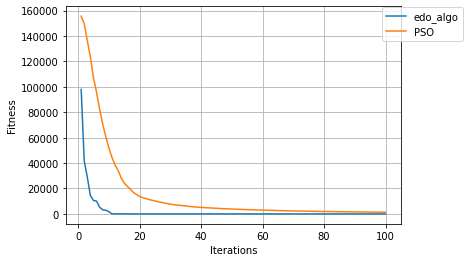

In [33]:
#Show selected convergence curve
Image(foldername +'/' + drop_plot_convergence.value)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

filename = foldername + '/experiment_details.csv'
df = pd.read_csv(filename)

# Read the data into a pandas DataFrame
# Plot convergence curves for each algorithm and function
algorithms = df['Optimizer'].unique()
functions = df['objfname'].unique()

print(algorithms)
print(functions)

# Set up a grid of subplots, 10 figures in total
num_figures = len(functions)
fig, axes = plt.subplots(num_figures, 1, figsize=(10, 5 * num_figures))

for i, func in enumerate(functions):
    ax = axes[i]
    for algo in algorithms:
        subset = df[(df['Optimizer'] == algo) & (df['objfname'] == func)]
        # Convert the values to string before using them in the label
        ax.plot(subset.columns[3:], subset.iloc[1, 3:].astype(str), label=f"{algo} - {func}")

    ax.set_xlabel("Iterations")
    ax.set_ylabel("Objective Value")
    ax.set_title(f"Convergence Curves - {func}")
    ax.legend()

plt.tight_layout()
plt.show()


['edo_algo' 'PSO' 'SSA' 'GA' 'BAT' 'FFA' 'GWO' 'WOA' 'MVO' 'MFO']
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10']



KeyboardInterrupt



['edo_algo' 'PSO' 'SSA' 'GA' 'BAT' 'FFA' 'GWO' 'WOA' 'MVO' 'MFO']
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10']


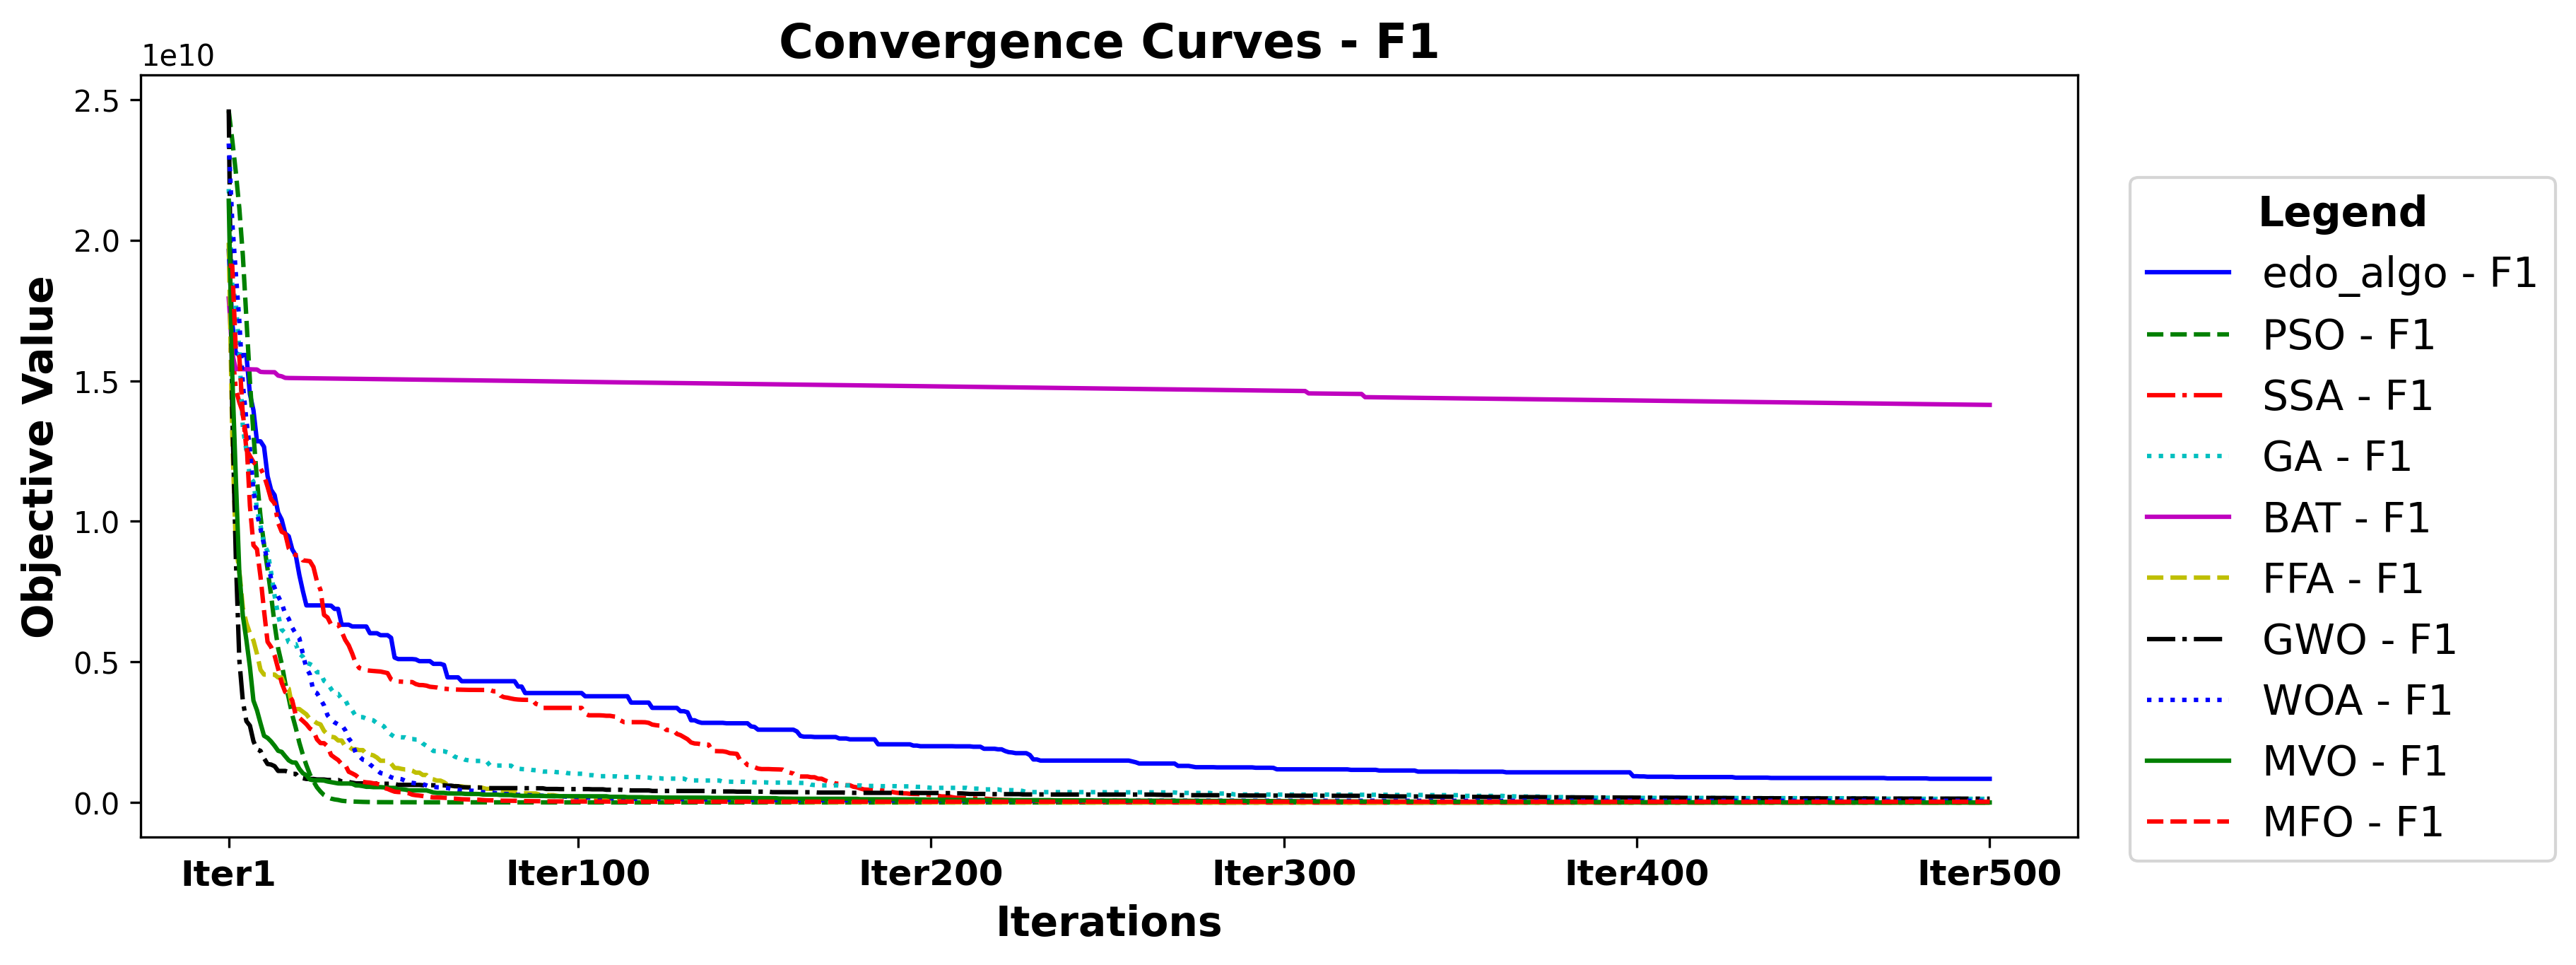

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

filename = foldername + '/experiment.csv'
df = pd.read_csv(filename)

# Read the data into a pandas DataFrame
# Plot convergence curves for the first function and all algorithms
algorithms = df['Optimizer'].unique()
functions = df['objfname'].unique()

print(algorithms)
print(functions)

# Choose the first function for plotting
selected_func = functions[0]

# Set up a single figure for all convergence curves
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define line styles and colors for each algorithm
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, algo in enumerate(algorithms):
    subset = df[(df['Optimizer'] == algo) & (df['objfname'] == selected_func)]
    # Convert the values to string before using them in the label
    ax.plot(subset.columns[3:], subset.iloc[0, 3:].astype(float),
            label=f"{algo} - {selected_func}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[i % len(colors)])

ax.set_xlabel("Iterations", fontsize=14, fontweight='bold')  # Adjust font size and make it bold
ax.set_ylabel("Objective Value", fontsize=14, fontweight='bold')  # Adjust font size and make it bold
ax.set_title(f"Convergence Curves - {selected_func}", fontsize=16, fontweight='bold')  # Adjust font size and make it bold
plt.xticks([0, 99, 199, 299, 399, 499], fontsize=12, fontweight='bold')  # Adjust font size

# Adjust layout and place legend outside the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Increase the bottom margin

# Get legend and customize title properties
legend = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='Legend', fontsize=14)
legend.get_title().set_fontsize(14)
legend.get_title().set_fontweight('bold')
plt.savefig(foldername + '/convergence_curves-F1.png', bbox_inches='tight')  # Set the desired filename and file format

plt.show()


In [106]:
import pandas as pd
import matplotlib.pyplot as plt

filename = foldername + '/experiment.csv'
df = pd.read_csv(filename)

# Read the data into a pandas DataFrame
# Plot convergence curves for all functions and all algorithms
algorithms = df['Optimizer'].unique()
functions = df['objfname'].unique()

print(algorithms)
print(functions)

for selected_func in functions:
    # Set up a new figure for each convergence curve
    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    # Define line styles and colors for each algorithm
    line_styles = ['-', '--', '-.', ':']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, algo in enumerate(algorithms):
        subset = df[(df['Optimizer'] == algo) & (df['objfname'] == selected_func)]
        # Convert the values to string before using them in the label
        ax.plot(subset.columns[3:], subset.iloc[0, 3:].astype(float),
                label=f"{algo} - {selected_func}",
                linestyle=line_styles[i % len(line_styles)],
                color=colors[i % len(colors)])

    ax.set_xlabel("Iterations", fontsize=14, fontweight='bold')  # Adjust font size and make it bold
    ax.set_ylabel("Objective Value", fontsize=14, fontweight='bold')  # Adjust font size and make it bold
    ax.set_title(f"Convergence Curves - {selected_func}", fontsize=16, fontweight='bold')  # Adjust font size and make it bold
    plt.xticks([0, 99, 199, 299, 399, 499], fontsize=12, fontweight='bold')  # Adjust font size

    # Adjust layout and place legend outside the plot
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Increase the bottom margin

    # Get legend and customize title properties
    legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='Legend', fontsize=14)
    legend.get_title().set_fontsize(14)
    legend.get_title().set_fontweight('bold')
    plt.savefig(foldername + f'/convergence_curves-{selected_func}.png', bbox_inches='tight')  # Set the desired filename and file format

    # Close the figure to prevent transparency issues
    plt.close(fig)

plt.show()


['edo_algo' 'PSO' 'SSA' 'GA' 'BAT' 'FFA' 'GWO' 'WOA' 'MVO' 'MFO']
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10']


['edo_algo' 'PSO' 'SSA' 'GA' 'BAT' 'FFA' 'GWO' 'WOA' 'MVO' 'MFO']
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10']


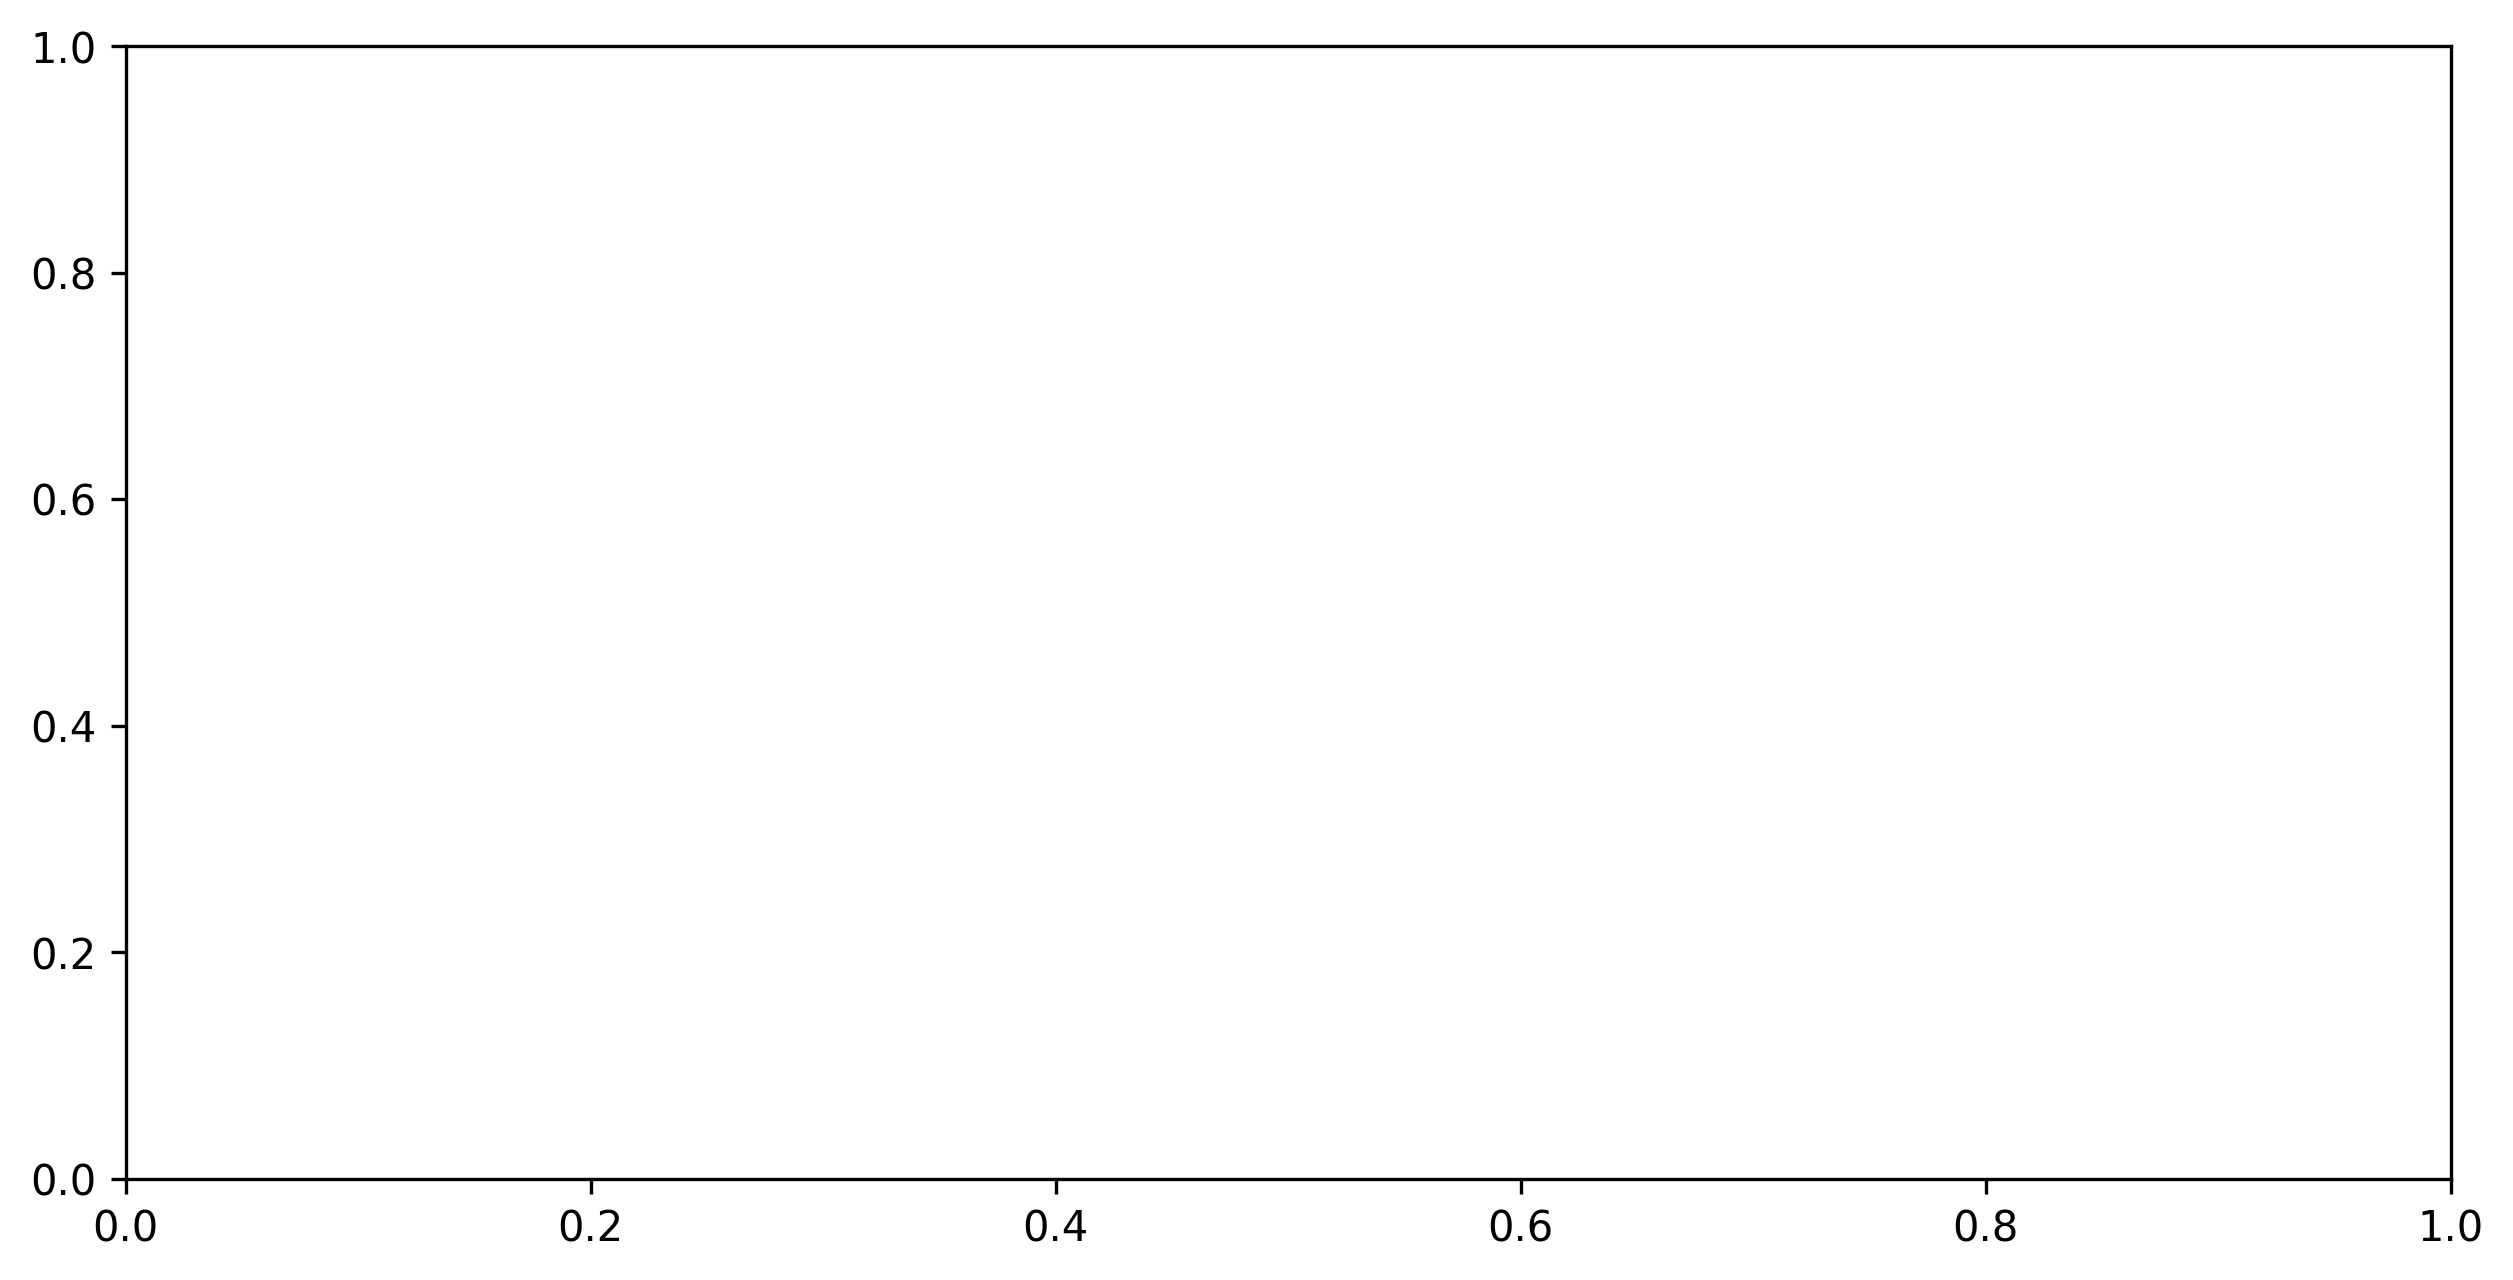

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

filename = foldername + '/experiment.csv'
df = pd.read_csv(filename)

# Read the data into a pandas DataFrame
# Plot convergence curves for all functions and all algorithms
algorithms = df['Optimizer'].unique()
functions = df['objfname'].unique()

print(algorithms)
print(functions)

# Set up a single figure for all convergence curves
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define line styles and colors for each algorithm
line_styles = ['-', '--', '-.', ':']
cmap = get_cmap('viridis')  # You can choose other colormaps

for selected_func in functions:
    num_algorithms = len(algorithms)
    colors = [cmap(i / num_algorithms) for i in range(num_algorithms)]

    # Set up a new figure for each boxplot
    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    for i, algo in enumerate(algorithms):
        subset = df[(df['Optimizer'] == algo) & (df['objfname'] == selected_func)]
        # Filter out non-numeric values before using them in the boxplot
        numeric_values = subset.iloc[0, 3:].apply(pd.to_numeric, errors='coerce')

        # Boxplot customization
        if i < len(colors):
            boxprops = dict(facecolor=colors[i], color=colors[i], linewidth=2)
            medianprops = dict(color='black', linewidth=2)
            whiskerprops = dict(color=colors[i], linewidth=2)
            capprops = dict(color=colors[i], linewidth=2)
            flierprops = dict(marker='o', markerfacecolor=colors[i], markersize=8, linestyle='none')

            ax.boxplot([numeric_values.dropna()], positions=[i], showfliers=False, boxprops=boxprops,
                       medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)
        else:
            print(f"Not enough colors for all algorithms. Add more colors to the 'colors' list or use a colormap.")

    ax.set_xlabel("Algorithms", fontsize=14, fontweight='bold')
    ax.set_ylabel("Objective Value", fontsize=14, fontweight='bold')
    ax.set_title(f"Boxplot - {selected_func}", fontsize=16, fontweight='bold')
    plt.xticks(range(len(algorithms)), algorithms, fontsize=12, fontweight='bold')

    # Adjust layout and place legend outside the plot
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    plt.savefig(foldername + f'/boxplot-{selected_func}.png', bbox_inches='tight')

    # Close the figure to prevent transparency issues
    plt.close(fig)

plt.show()


<h4>Box Plot</h4>

In [36]:
#Select boxplot to show
filenames = [filename for filename in os.listdir(foldername) if filename.startswith('boxplot')]

drop_boxplot = widgets.Dropdown(options=filenames, description='Select plot:')
drop_boxplot

Dropdown(description='Select plot:', options=('boxplot-F1.png',), value='boxplot-F1.png')

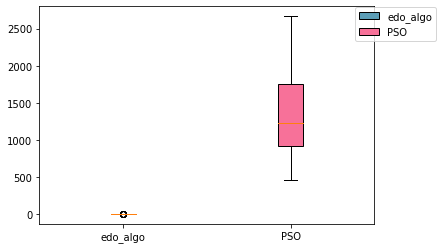

In [37]:
#Show selected boxplot
Image(foldername +'/' + drop_boxplot.value)

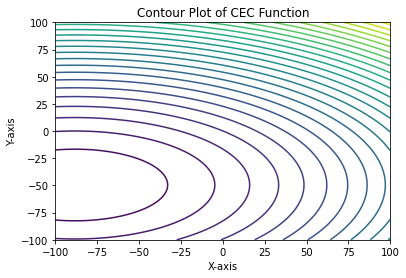

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from opfunu.cec_based import F12020

def plot_cec_contour(func, lb, ub, resolution=100):
    x = np.linspace(lb, ub, resolution)
    y = np.linspace(lb, ub, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(resolution):
        for j in range(resolution):
            solution = np.array([X[i, j], Y[i, j], 0, 0, 0, 0, 0, 0, 0, 0])  # Create a 10-dimensional solution vector
            Z[i, j] = func.evaluate(solution)

    plt.contour(X, Y, Z, levels=30, cmap='viridis')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Contour Plot of CEC Function')
    plt.show()

# Example usage:
cec_func = F12020(ndim=10)
lb, ub = -100, 100
plot_cec_contour(cec_func, lb, ub)


In [10]:
from opfunu.utils import visualize


In [11]:
visualize.plot_2d(1)

AttributeError: 'int' object has no attribute 'bounds'

In [40]:
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from matplotlib import cm

cmap = [(0, '#2f9599'), (0.45, '#eeeeee'), (1, '#8800ff')]
cmap = cm.colors.LinearSegmentedColormap.from_list('Custom', cmap, N=256)


def plot_latex_formula(latex):
    base_url = r'https://latex.codecogs.com/png.latex?\dpi{400}'
    url = f'{base_url}{latex}'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    plt.imshow(img)
    plt.axis('off')
    plt.show()


def plot_2d(func, n_space=1000, cmap=cmap, XYZ=None, ax=None, show=True):
    X_domain, Y_domain = func.bounds
    if XYZ is None:
        X, Y = np.linspace(*X_domain, n_space), np.linspace(*Y_domain, n_space)
        X, Y = np.meshgrid(X, Y)
        XY = np.array([X, Y])
        Z = np.apply_along_axis(func.evaluate, 0, XY)
    else:
        X, Y, Z = XYZ

    # create new ax if None
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    # add contours and contours lines
    # ax.contour(X, Y, Z, levels=30, linewidths=0.5, colors='#999')
    ax.contourf(X, Y, Z, levels=30, cmap=cmap, alpha=0.7)

    # add labels and set equal aspect ratio
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect(aspect='equal')
    if show:
        plt.show()


def plot_3d(func, n_space=1000, cmap=cmap, XYZ=None, ax=None, show=True):
    X_domain, Y_domain = func.bounds
    if XYZ is None:
        X, Y = np.linspace(*X_domain, n_space), np.linspace(*Y_domain, n_space)
        X, Y = np.meshgrid(X, Y)
        XY = np.array([X, Y])
        Z = np.apply_along_axis(func.evaluate, 0, XY)
    else:
        X, Y, Z = XYZ

    # create new ax if None
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection='3d')

    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cmap, linewidth=0, antialiased=True, alpha=0.7)
    ax.contour(X, Y, Z, zdir='z', levels=30, offset=np.min(Z), cmap=cmap)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    ax.zaxis.set_tick_params(labelsize=8)
    if show:
        plt.show()


In [41]:
func=opfunu.cec_based.F12020(ndim=10)

print(func.bounds)
plot_2d(func)

[[-100.  100.]
 [-100.  100.]
 [-100.  100.]
 [-100.  100.]
 [-100.  100.]
 [-100.  100.]
 [-100.  100.]
 [-100.  100.]
 [-100.  100.]
 [-100.  100.]]
(2, 50, 50)


ValueError: F12020 problem, the length of solution should have 10 variables!

In [46]:
print(np.arange(-100, 100, 40))

[-100  -60  -20   20   60]


PSO is optimizing  "F1"
['At iteration 1 the best fitness is 12237173177.682032']
['At iteration 2 the best fitness is 12237173177.682032']
['At iteration 3 the best fitness is 12237173177.682032']
['At iteration 4 the best fitness is 12237173177.682032']
['At iteration 5 the best fitness is 12237173177.682032']
['At iteration 6 the best fitness is 12237173177.682032']
['At iteration 7 the best fitness is 12237173177.682032']
['At iteration 8 the best fitness is 12237173177.682032']
['At iteration 9 the best fitness is 11054512542.725077']
['At iteration 10 the best fitness is 10150521909.440157']
['At iteration 11 the best fitness is 9439580432.54219']
['At iteration 12 the best fitness is 8597444281.588804']
['At iteration 13 the best fitness is 8305978154.06583']
['At iteration 14 the best fitness is 7978249133.328085']
['At iteration 15 the best fitness is 7865556243.370217']
['At iteration 16 the best fitness is 7865556243.370217']
['At iteration 17 the best fitness is 7593688096.

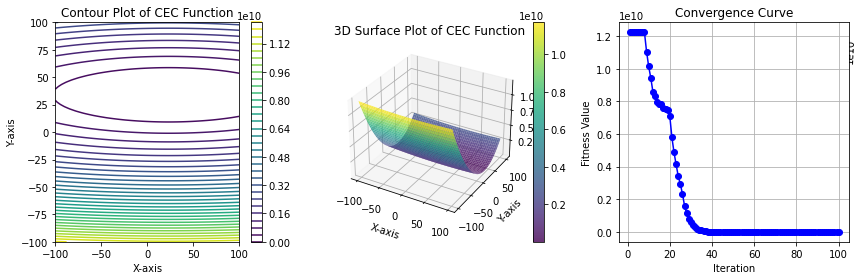

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from opfunu.cec_based import F52020
import optimizers.PSO as pso

def plot_cec_surface_and_contour(func, lb, ub, resolution, max_iterations=100):
    x = np.linspace(lb, ub, resolution)
    y = np.linspace(lb, ub, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    convergence_curve = []  # Store function values over iterations

    for i in range(resolution):
        for j in range(resolution):
            result = np.concatenate([np.ones(5) * x[i], np.ones(5) * y[j]])
            Z[i, j] = func.evaluate(result)

    # Convergence curve
    # Example: Evaluate the function at a specific point in the search space
    solution = np.random.uniform(lb, ub, size=10)  # Replace this with your optimization algorithm
    x = pso.PSO(getattr(benchmarksdeep, "F1"), lb, ub, 10, 10, 100)
    function_value = func.evaluate(solution)
    convergence_curve = x.convergence

    fig = plt.figure(figsize=(12, 4))

    # Contour plot
    ax1 = fig.add_subplot(131)
    contours = ax1.contour(X, Y, Z, levels=30, cmap='viridis')
    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y-axis')
    ax1.set_title('Contour Plot of CEC Function')
    plt.colorbar(contours, ax=ax1)

    # 3D surface plot
    ax2 = fig.add_subplot(132, projection='3d')
    surface = ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')
    ax2.set_zlabel('', labelpad=200)
    ax2.set_title('3D Surface Plot of CEC Function')
    plt.colorbar(surface, ax=ax2)

    # Convergence curve plot (2D)
    ax3 = fig.add_subplot(133)
    ax3.plot(range(1, max_iterations + 1), convergence_curve, marker='o', linestyle='-', color='b')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Fitness Value')
    ax3.set_title('Convergence Curve')
    ax3.grid(True)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage for CEC function F19:
cec_func = F52020(ndim=10)
lb, ub = -100, 100
plot_cec_surface_and_contour(cec_func, lb, ub, 100, max_iterations=100)


(100,)


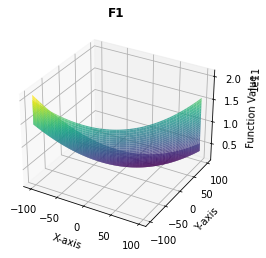

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from opfunu.cec_based import F12020

def my_func_plot(func_No):
    Function_num = 'F1'
    lb, ub = -100, 100
    func = F12020(ndim=10)

    rate = (abs(lb) + abs(ub)) / 100
    x = np.arange(lb, ub, rate)
    y = x
    print(np.shape(x))

    if func_No > 10:
        y_values = func.evaluate(np.array([x, x]))  # Use the evaluate method directly
        z = np.outer(y_values, y_values)
    else:
        L = len(x)
        z = np.empty((L, L))

        for i in range(L):
            for j in range(L):
                result = np.concatenate([np.ones(15) * x[i], np.ones(15) * y[j]])
                z[i, j] = func.evaluate(result)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X=x, Y=y, Z=z, cmap='viridis', alpha=0.8)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Function Value')
    ax.set_title(Function_num, fontweight='bold')

    plt.show()

# Example usage:
my_func_plot(1)  # Replace with the desired function number


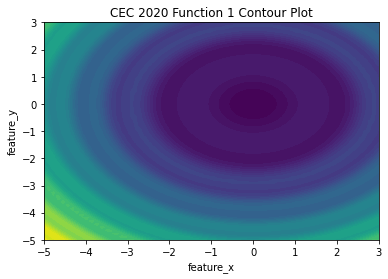

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def cec_2020_function_1(x, y):
    return 0.5 * (x**2 + y**2) + np.sin(x**2 + y**2)

feature_x = np.linspace(-5.0, 3.0, 70)
feature_y = np.linspace(-5.0, 3.0, 70)

[X, Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z = cec_2020_function_1(X, Y)

ax.contourf(X, Y, Z, levels=50, cmap='viridis')  # You can adjust levels and cmap as per your preference

ax.set_title('CEC 2020 Function 1 Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def cec_2020_function_1(x, y):
    return x**2 + y**2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y) + 20

def cec_2020_function_2(x, y):
    return (x + 2)**2 + (y - 1)**2

def cec_2020_function_3(x, y):
    return x**2 + 2 * y**2 + 25 * (np.sin(2 * np.pi * x) + np.sin(2 * np.pi * y)) + 30

def cec_2020_function_4(x, y):
    return (x - 2)**2 + (y + 3)**2 + 2 * np.sin(2 * np.pi * x) + 3 * np.sin(2 * np.pi * y)

def cec_2020_function_5(x, y):
    return 0.5 * (x**2 + y**2) + np.sin(x**2 + y**2)

def cec_2020_function_6(x, y):
    return x**2 - y**2

def cec_2020_function_7(x, y):
    return (x - 1)**2 + (y + 2)**2 + np.exp(-(x - 1)**2 - (y + 2)**2)

def cec_2020_function_8(x, y):
    return (x + 3)**2 + (y - 1)**2 + np.sin(2 * np.pi * (x + 3)) + np.sin(2 * np.pi * (y - 1))

def cec_2020_function_9(x, y):
    return 0.1 * (x**2 + y**2) + np.sin(3 * np.pi * x) + np.sin(3 * np.pi * y)

def cec_2020_function_10(x, y):
    return 0.5 * (x**2 + y**2) + np.sin(x**2 + y**2)

# Define the range of features
feature_x = np.linspace(-5.0, 5.0, 100)
feature_y = np.linspace(-5.0, 5.0, 100)

# Create a meshgrid
X, Y = np.meshgrid(feature_x, feature_y)

# Calculate Z values for the function
Z = cec_2020_function_4(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Add labels and title
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
ax.set_zlabel('Function Value')
ax.set_title('CEC 2020 Function 1 - 3D Surface Plot')

# Add a colorbar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cec_2020_function_1(x, y):
    return x**2 + 2 * y**2 + 25 * (np.sin(2 * np.pi * x) + np.sin(2 * np.pi * y)) + 30

# Define the range of features
feature_x = np.linspace(-5.0, 5.0, 100)
feature_y = np.linspace(-5.0, 5.0, 100)

# Create a meshgrid
X, Y = np.meshgrid(feature_x, feature_y)

# Plot the search space without function values
plt.figure(figsize=(8, 6))
plt.imshow(X, extent=(feature_x.min(), feature_x.max(), feature_y.min(), feature_y.max()), origin='lower', cmap='viridis')
plt.colorbar(label='Feature Value')
plt.title('Search Space for CEC 2020 Function 1')
plt.xlabel('feature_x')
plt.ylabel('feature_y')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def cec20_func(x, func_num):
    # Implementation of your CEC 2020 function here
    # Replace this with the actual implementation of your functions
    pass

def initialization(search_agents_no, dim, ub, lb):
    return np.random.uniform(lb, ub, size=(search_agents_no, dim))

def my_func_plot(func_num):
    # Implementation of your function plot
    pass

def my_func_contour_plot(func_num):
    # Implementation of your contour plot
    pass

def EO_en(search_agents_no, max_iteration, lb, ub, dim, fobj, func_num, positions):
    # Implementation of your optimization algorithm
    # Replace this with the actual implementation of your algorithm
    pass

def main():
    i = 5
    search_agents_no = 50  # Number of search agents
    lb = -100
    ub = 100
    max_iteration = 100
    dim = 30

    for i in range(9, 10):
        fun_no = i
        fno = str(fun_no)

        function_name = 'F' + fno
        title = ''

        lb = np.ones(dim) * lb  # lower boundary
        ub = np.ones(dim) * ub
        positions = initialization(search_agents_no, dim, ub, lb)

        best_score, attacker_pos, conv_fit, div = EO_en(search_agents_no, max_iteration, -100, 100, dim, cec20_func, fun_no, positions)

        plt.figure(figsize=(14, 3.5))

        # Draw search space
        plt.subplot(1, 4, 1)
        my_func_plot(fun_no)
        plt.title(function_name, fontsize=14)
        plt.xlabel('x_1', fontsize=14)
        plt.ylabel('x_2', fontsize=14)
        plt.box(True)
        plt.axis('tight')

        plt.subplot(1, 4, 2)
        plt.contourf
        my_func_contour_plot(fun_no)
        plt.box(True)
        plt.axis('tight')

        plt.subplot(1, 4, 3)
        plt.plot(np.sort(np.mean(conv_fit, axis=0))[::-1], color='g')
        plt.title('Average fitness history', fontweight='bold', fontsize=14)
        plt.box(True)

        plt.subplot(1, 4, 4)
        plt.plot(conv_fit, color='r')
        plt.title('Convergence curve', fontweight='bold', fontsize=14)
        plt.box(True)
        plt.axis('tight')
        plt.yscale('log')
        plt.xlabel('Iteration#', fontsize=14)
        plt.ylabel('Best score obtained so far', fontsize=14)

        plt.savefig(f'Qualitative-F{i}.png')
        plt.savefig(f'Qualitative-F{i}.eps')
        plt.savefig(f'Qualitative-F{i}.fig')

if __name__ == "__main__":
    main()
